In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## EDA

- Binary classification

In [7]:
df = pd.read_csv("titanic/train.csv")

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
list(df.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [10]:
df.shape

(891, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### No duplicated data

In [13]:
len(df[df.duplicated()])

0

In [14]:
# rename columns
df.rename(columns={
    "PassengerId": "id", 
    "Survived": "target",
    "Pclass":"pclass",
    "Name": "name",
    "Sex": "sex",
    "Age" : "age",
    "SibSp" : "sibsip",
    "Parch": "parch",
    "Ticket":"ticket",
    "Fare":"fare",
    "Cabin" : "cabin",
    "Embarked" : "embarked"
}, inplace=True)

### Analysis of Pclass variable

- No Missing variables
- Categorical variable (Already cleaned)
    - 1 - upper class
    - 2 - Middle clas
    - 3 - lower class

In [15]:
df["pclass"].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [16]:
def catergorical_plot(x_ax, title, x_label,y_label=None):
    plt.figure(figsize=(10,5))
    sns.countplot(df,x=x_ax)
    plt.title(title)
    plt.xlabel(x_label)

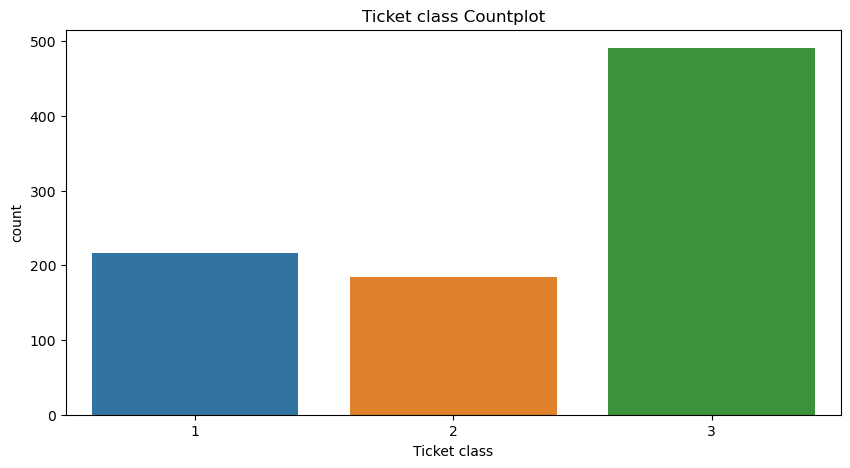

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(df,x="pclass")
plt.title("Ticket class Countplot")
plt.xlabel("Ticket class");

## Analysis for Sex variable

- No missing data
- Categorial data
    - One-hot encoding
    

In [20]:
df["sex"].value_counts()

male      577
female    314
Name: sex, dtype: int64

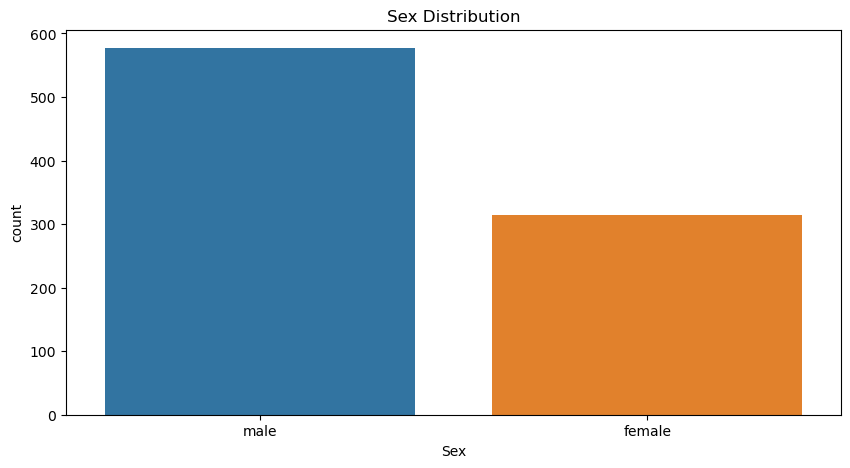

In [19]:
# countplot for sex distibution
catergorical_plot("sex", "Sex Distribution", "Sex")